In [1]:
import sys
sys.path.append('../../')

In [2]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from create_dataset_lib import CreateDatasetLib
from lib.viz import plot_mattress, plot_skeleton, plot_results
from lib.constants import set_format, constants

In [3]:
set_format('hrl-ros')

In [4]:
SAMPLE = 60

In [5]:
z = zipfile.ZipFile('data/subject_1YJAG.zip') 
data = pd.read_pickle(z.open('subject_1YJAG/LH1.p'))

In [6]:
len(data)

201

In [7]:
p_mat_raw = np.asarray(data[SAMPLE][0]).reshape(constants.SENSORS_Y, constants.SENSORS_X)
target_raw = data[SAMPLE][1]

<AxesSubplot:>

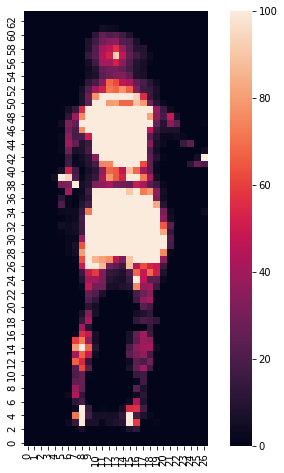

In [8]:
plt.figure(1).set_size_inches(8, 8)
plot_mattress(p_mat_raw)

In [9]:
[p_world_mat, R_world_mat] = pd.read_pickle('data/mat_axes.p')

In [10]:
target_mat = CreateDatasetLib().world_to_mat(target_raw, p_world_mat, R_world_mat)
target_mat

array([[ 0.61971331,  1.95523623,  0.19584662],
       [ 0.62397947,  1.44090181,  0.09433359],
       [ 0.40610671,  1.41963503, -0.01729119],
       [ 0.9426416 ,  1.49907049, -0.01396799],
       [ 0.37974351,  1.22899194,  0.00335503],
       [ 1.06681815,  1.38327854,  0.02574486],
       [ 0.5570816 ,  0.87435746,  0.10105574],
       [ 0.82088329,  0.90020055,  0.06849468],
       [ 0.5066228 ,  0.52859394,  0.02229047],
       [ 0.78547677,  0.48470466,  0.01086313]])

<AxesSubplot:>

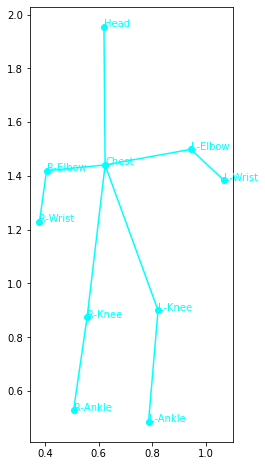

In [11]:
plt.figure(1).set_size_inches(8, 8)
plot_skeleton(target_mat, scale_up=False)

In [12]:
target_mat[:,0] -= constants.MATTRESS_WIDTH/3
target_mat[:,0] /= constants.MATTRESS_WIDTH
target_mat[:,1] -= constants.MATTRESS_HEIGHT/6
target_mat[:,1] /= constants.MATTRESS_HEIGHT

<AxesSubplot:>

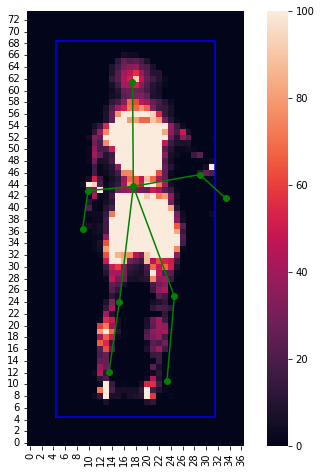

In [13]:
plt.figure(1).set_size_inches(8, 8)
plot_results(p_mat_raw, [target_mat], skeleton_col=['green'])